In [1]:
using Plots
using Random
using Statistics

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


In [2]:
mutable struct Individual
    genes::BitArray
    fitness::Int64
end

function Individual(n::Int64)
    Individual(bitrand(n),0)
end

n=20
ind = Individual(n)

Individual(Bool[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], 0)

In [3]:
function onemax(ind::Individual)
    sum(ind.genes)
end

ind, onemax(ind)

(Individual(Bool[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], 0), 10)

In [4]:
function evaluate!(ind::Individual, objective::Function)
    ind.fitness = objective(ind)
end

evaluate!(ind, onemax)
ind


Individual(Bool[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], 10)

In [6]:
parent = Individual(n)
evaluate!(parent, onemax)

11

In [7]:
function mutate(ind::Individual; mutation_rate::Float64=1.0/length(ind.genes))
    new_genes = copy(ind.genes)
    for i in eachindex(new_genes)
        if rand() < mutation_rate
            new_genes[i] = ~ind.genes[i]
        end
    end
    Individual(new_genes, 0)
end

mutate (generic function with 1 method)

In [15]:

child = mutate(parent)
evaluate!(child, onemax)
print(parent.genes .== child.genes)


Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

In [16]:
if child.fitness >= parent.fitness
    parent = child
end
parent.fitness

11

In [25]:
for i in 1:5
    child = mutate(parent)
    evaluate!(child, onemax)
    if child.fitness >= parent.fitness
        parent = child
    end
end

print(parent.fitness, " / ", n)

20 / 20

In [26]:
function one_plus_one(ind_length::Int, num_generations::Int, f::Function)
    fits = zeros(num_generations)
    parent = Individual(ind_length)
    evaluate!(parent, f)
    
    for i in eachindex(fits)
        child = mutate(parent)
        evaluate!(child, f)

        if child.fitness >= parent.fitness
            parent = child
        end

        fits[i] = parent.fitness
    end
    fits
end

one_plus_one (generic function with 1 method)

1000.0


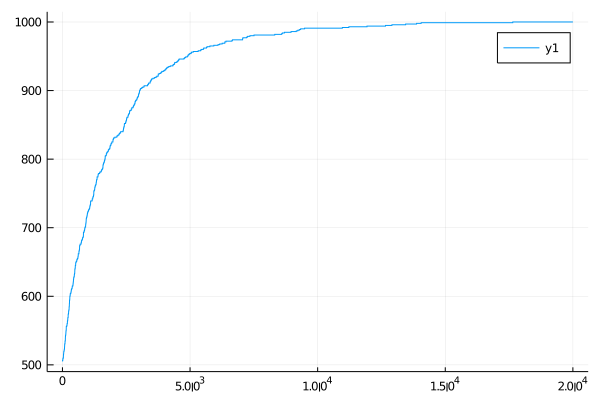

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error


In [28]:
n = 1000
fits = one_plus_one(n, 20000, onemax)
println(fits[end])
plot(fits)

In [29]:
function leading_ones(ind::Individual)
    f = 0
    for i in eachindex(ind.genes)
        if ~ind.genes[i]
            f = i-1
            break
        end
    end
    f
end

leading_ones(ind)

0

99.0


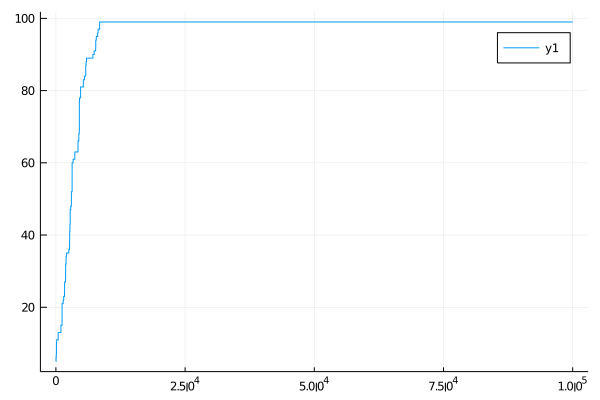

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error


In [35]:
n = 100
fits = one_plus_one(n, 100000, leading_ones)
println(fits[end])
plot(fits)


In [36]:

n = 100
𝜆 = Int(round(log(n)log(log(n))/log(log(log(n)))))

17

In [37]:
𝜆 = 10

10

In [38]:
function one_plus_lambda(ind_length::Int, num_generations::Int, f::Function, 𝜆::Int)
    
    fits = zeros(num_generations)
    expert = Individual(ind_length)
    evaluate!(expert, f)
    
    for i in eachindex(fits)
        population = Array{Individual}(undef, 𝜆)
        best = 1
        for j in eachindex(population)
            population[j] = mutate(expert)
            evaluate!(population[j], f) 
            if population[j].fitness > population[best].fitness
                best = j
            end
        end
        
        if population[best].fitness >= expert.fitness
            expert = population[best]
        end

        fits[i] = expert.fitness
    end
    fits
end

one_plus_lambda (generic function with 1 method)

In [39]:
n = 100
n_gens = 1000
fits_1 = one_plus_one(n, n_gens, onemax)
fits_𝜆 = one_plus_lambda(n, n_gens, onemax, 𝜆)
fits_1[end], fits_𝜆[end]

(100.0, 100.0)

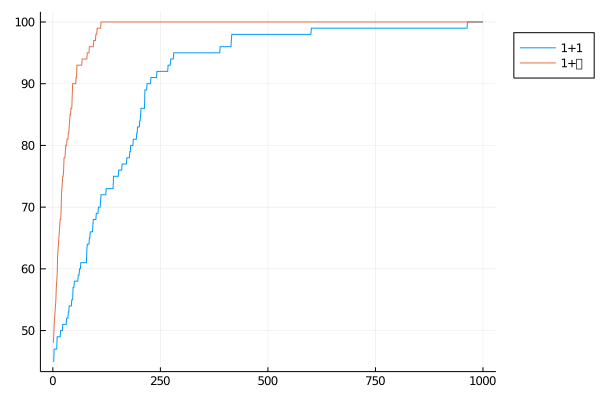

In [40]:
plot(fits_1, label="1+1", legend=:outertopright)
plot!(fits_𝜆, label="1+𝜆")

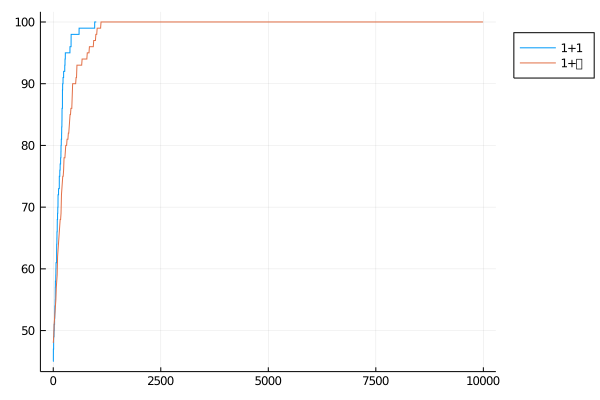

In [41]:

plot(fits_1, label="1+1", legend=:outertopright)
plot!(1:𝜆:𝜆*n_gens, fits_𝜆, label="1+𝜆")

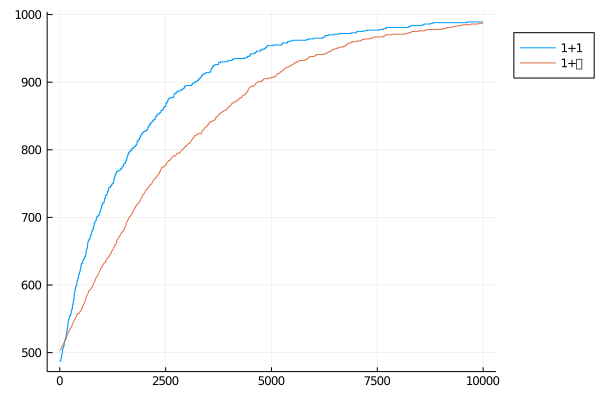

In [42]:
n = 1000
n_gens = 10000
fits_1 = one_plus_one(n, n_gens, onemax)
fits_𝜆 = one_plus_lambda(n, Int(n_gens/𝜆), onemax, 𝜆)
plot(fits_1, label="1+1", legend=:outertopright)
plot!(1:𝜆:n_gens, fits_𝜆, label="1+𝜆")

In [43]:
n_trials = 10
n = 100
n_gens = 1000

fits_1 = zeros(n_gens, n_trials)
fits_𝜆 = zeros(Int(n_gens/𝜆), n_trials)

for i in 1:n_trials
    fits_1[:, i] = one_plus_one(n, n_gens, onemax)
    fits_𝜆[:, i] = one_plus_lambda(n, Int(n_gens/𝜆), onemax, 𝜆)
end

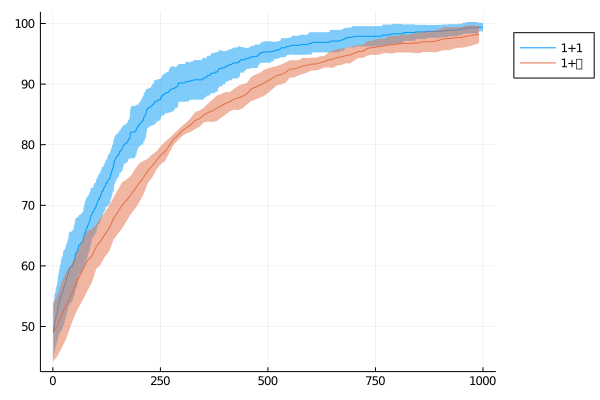

In [44]:
μ_1 = mean(fits_1, dims=2)
σ_1 = std(fits_1, dims=2)
μ_𝜆 = mean(fits_𝜆, dims=2)
σ_𝜆 = std(fits_𝜆, dims=2)
plot(1:n_gens, μ_1, ribbon=σ_1, label="1+1", legend=:outertopright)
plot!(1:𝜆:n_gens, μ_𝜆, ribbon=σ_𝜆, label="1+𝜆")

In [49]:
n_trials = 30
n = 100
n_gens = 10000

fits_1 = zeros(n_gens, n_trials)
fits_𝜆 = zeros(Int(n_gens/𝜆), n_trials)

for i in 1:n_trials
    fits_1[:, i] = one_plus_one(n, n_gens, leading_ones)
    fits_𝜆[:, i] = one_plus_lambda(n, Int(n_gens/𝜆), leading_ones, 𝜆)
end

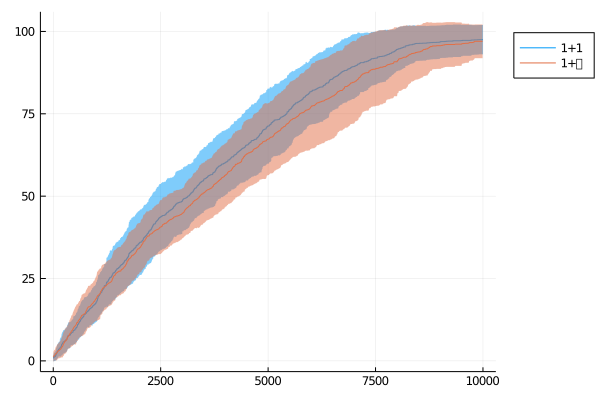

In [50]:
μ_1 = mean(fits_1, dims=2)
σ_1 = std(fits_1, dims=2)
μ_𝜆 = mean(fits_𝜆, dims=2)
σ_𝜆 = std(fits_𝜆, dims=2)
plot(1:n_gens, μ_1, ribbon=σ_1, label="1+1", legend=:outertopright)
plot!(1:𝜆:n_gens, μ_𝜆, ribbon=σ_𝜆, label="1+𝜆")

In [51]:
mutable struct FloatIndividual
    genes::Array{Float64}
    fitness::Float64
end

function FloatIndividual(n::Int64)
    FloatIndividual(rand(n), -Inf)
end

n = 10
ind = FloatIndividual(n)

FloatIndividual([0.72066764622689, 0.6097764973049191, 0.6848288037756831, 0.12598786515404514, 0.3398075415641706, 0.27384644419604953, 0.9126893088829906, 0.08692372772976009, 0.3340817655466253, 0.565388591103247], -Inf)

In [52]:
function mutate(ind::FloatIndividual; mutation_rate::Float64=1.0/length(ind.genes))
    new_genes = copy(ind.genes)
    for i in eachindex(new_genes)
        if rand() < mutation_rate
            new_genes[i] = rand()
        end
    end
    FloatIndividual(new_genes, 0)
end

child = mutate(ind)
print(ind.genes .== child.genes)

Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

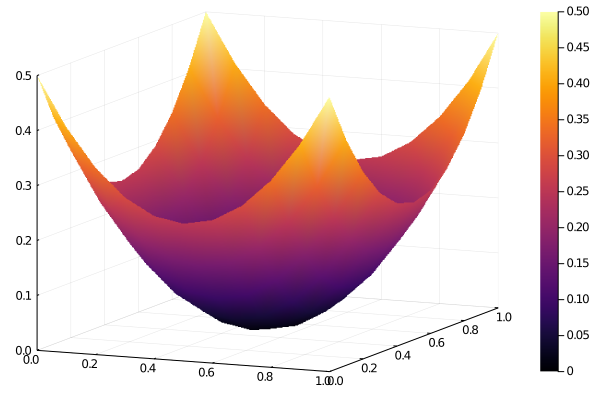

In [54]:
x = 0:0.1:1.0
y = 0:0.1:1.0
fz(x, y) = (x-0.5)^2 + (y-0.5)^2
plot(x, y, fz, st=:surface)

In [55]:
function sphere(ind::FloatIndividual; center::Float64=0.5)
    f = 0
    for g in ind.genes
        f += (g - center)^2
    end
    -f
end

sphere(ind)

-0.6843479084611074